In [1]:
import string
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Language Detection.csv")

In [3]:
df.head(5)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def remove_pun(text):
    for pun in string.punctuation:
        text=text.replace(pun,"")
    text=text.lower()
    return(text)

In [6]:
df['Text']=df['Text'].apply(remove_pun)

In [7]:
df.head(5)

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,1 the word nature is borrowed from the old fre...,English


In [8]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

<AxesSubplot:xlabel='Language', ylabel='count'>

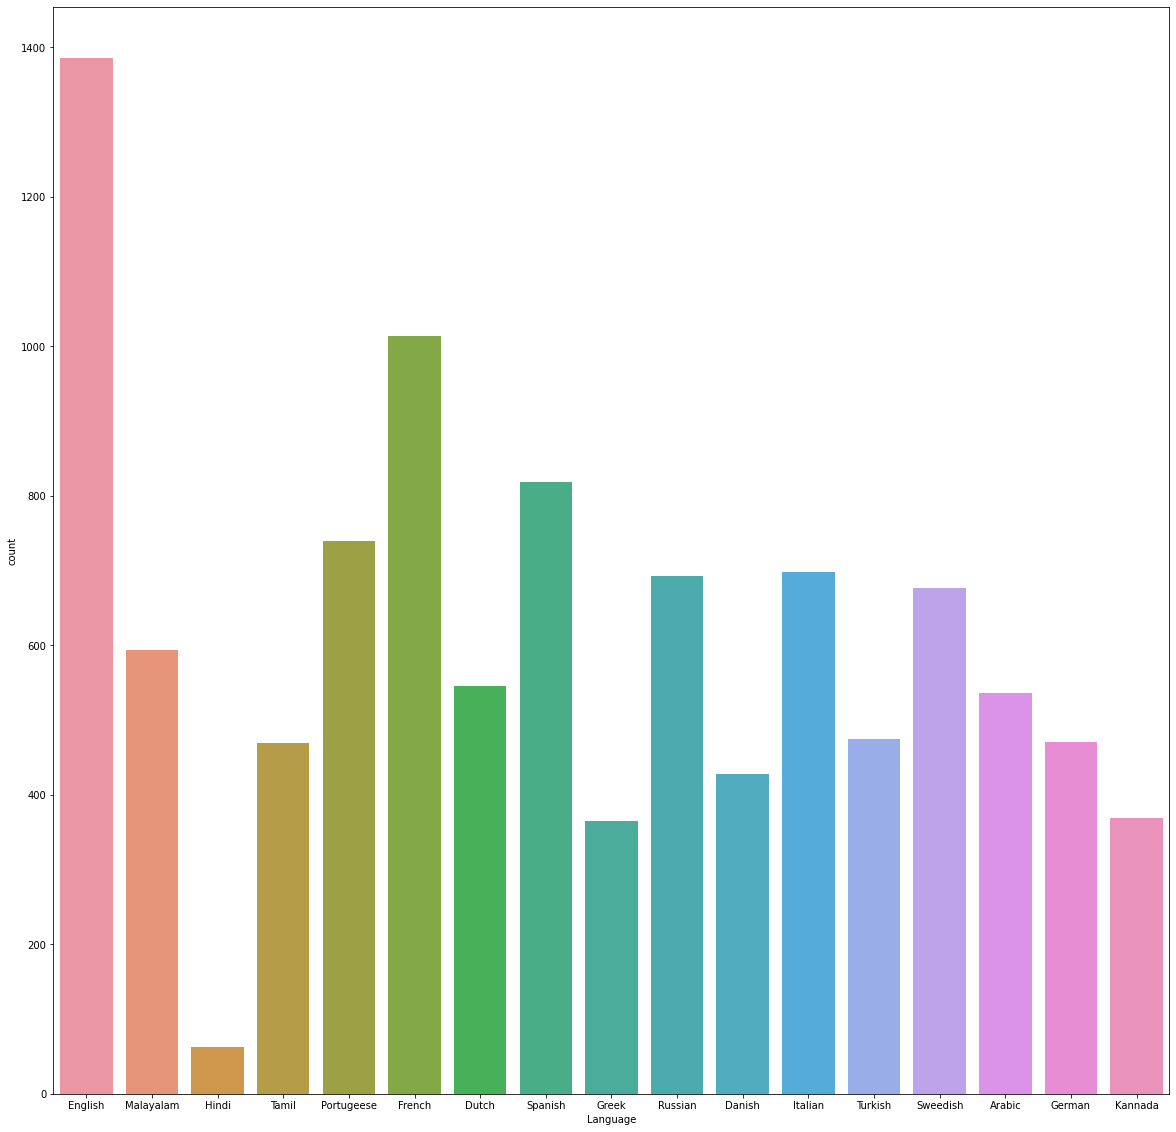

In [9]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.iloc[:,0]
Y=df.iloc[:,1]

In [12]:
Y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [13]:
df.describe()

,Text,Language
count,10337,10337
unique,10251,17
top,என்னை மன்னிக்கவும்,English
freq,4,1385


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
X_train

893     the method is strongly nphard and difficult to...
5402                    no has hecho un trabajo increíble
600     citation needed wikipedia currently runs on de...
3718    metapedia existe en suédois en anglais en hong...
146     properties common to terrestrial organisms pla...
                              ...                        
6620                                       мне очень жаль
5495                                    espera un momento
5764    τι συμβαίνει αν δεν πιάσατε κάτι ή δεν καταλάβ...
5458                                           déjame ver
6553                                  боюсь я не согласен
Name: Text, Length: 8269, dtype: object

In [17]:
#vectorization

In [18]:
from sklearn import feature_extraction

In [19]:
vec=feature_extraction.text.TfidfVectorizer(ngram_range=(1,2),analyzer='char')

In [26]:
from sklearn import pipeline
from sklearn import linear_model

In [28]:
model_pipe=pipeline.Pipeline([('vec',vec),('clf',linear_model.LogisticRegression())])

In [29]:
model_pipe.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
model_mnb=pipeline.Pipeline([('vec',vec),('clf',MultinomialNB())])

In [38]:
model_mnb.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', MultinomialNB())])

In [39]:
predict_val=model_pipe.predict(X_test)

In [40]:
from sklearn import metrics

In [41]:
metrics.accuracy_score(Y_test,predict_val)*100

97.87234042553192

In [42]:
predict_val1=model_mnb.predict(X_test)

In [43]:
metrics.accuracy_score(Y_test,predict_val1)

0.7408123791102514

In [48]:
matrix=metrics.confusion_matrix(Y_test,predict_val)

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
model_pipe.predict(['my team name is 8+8=91'])

array(['English'], dtype=object)

In [56]:
model_pipe.predict(['मेरी टीम का नाम 8+8=91 . है'])

array(['Hindi'], dtype=object)

In [57]:
model_pipe.predict(['எனது அணியின் பெயர் 8+8=91'])

array(['Tamil'], dtype=object)

In [60]:
import pickle
lrfile=open('model.pkl','wb')
pickle.dump(model_pipe,lrfile)
lrfile.close()

In [59]:
mnbfile=open('modelmnb.pkl','wb')
pickle.dump(model_mnb,mnbfile)
mnbfile.close()